In [1]:
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import atmosDensity, Cubesat
from maneuvers import Maneuvers
from coordinates import cart2kep
from constants import constants
import helpers

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [10]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+500e3
ra = constants.Re+501e3
Omega = 30*np.pi/180
i = 10*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat()

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("thrust")
%time maneuvers.propagate2(60*60*15)
maneuvers.removePerturbation("thrust")
maneuvers.propagate2(60*60*24*2)

Propagating...from day  0.0  to  1.0
Day:0.0	Height: 500.058518193488 km	Mass: 1.0
Day:8.482702742016732e-08	Height: 500.058516290511 km	Mass: 1.0
Day:1.6965405484033464e-07	Height: 500.0585143875638 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.0409560450586 km	Mass: 1.0
Day:0.0008484399282565136	Height: 500.04095604849607 km	Mass: 1.0
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Propagating...from day  1.0  to  1.625
Day:1.0	Height: 500.16404339219537 km	Mass: 1.0
Day:1.0000896785580766	Height: 500.16724682561585 km	Mass: 0.9998902567104914
Day:1.0000896785580766	Height: 500.16722978155127 km	Mass: 0.9998902567104914
Day:1.0000173204791714	Height: 500.16465699713865 km	Mass: 0.999978804226998
Day:1.0000173204791714	Height: 500.1646568774823 km	Mass: 0.999978804226998
Day:1.0000346409583427	Height: 500.1652715289462 km	Mass: 0.9999576084539961
Day:1.0000346409583427	Height: 500.16527140929736 km	Mass: 0.9999576084539961
Day:1.

<IPython.core.display.Javascript object>


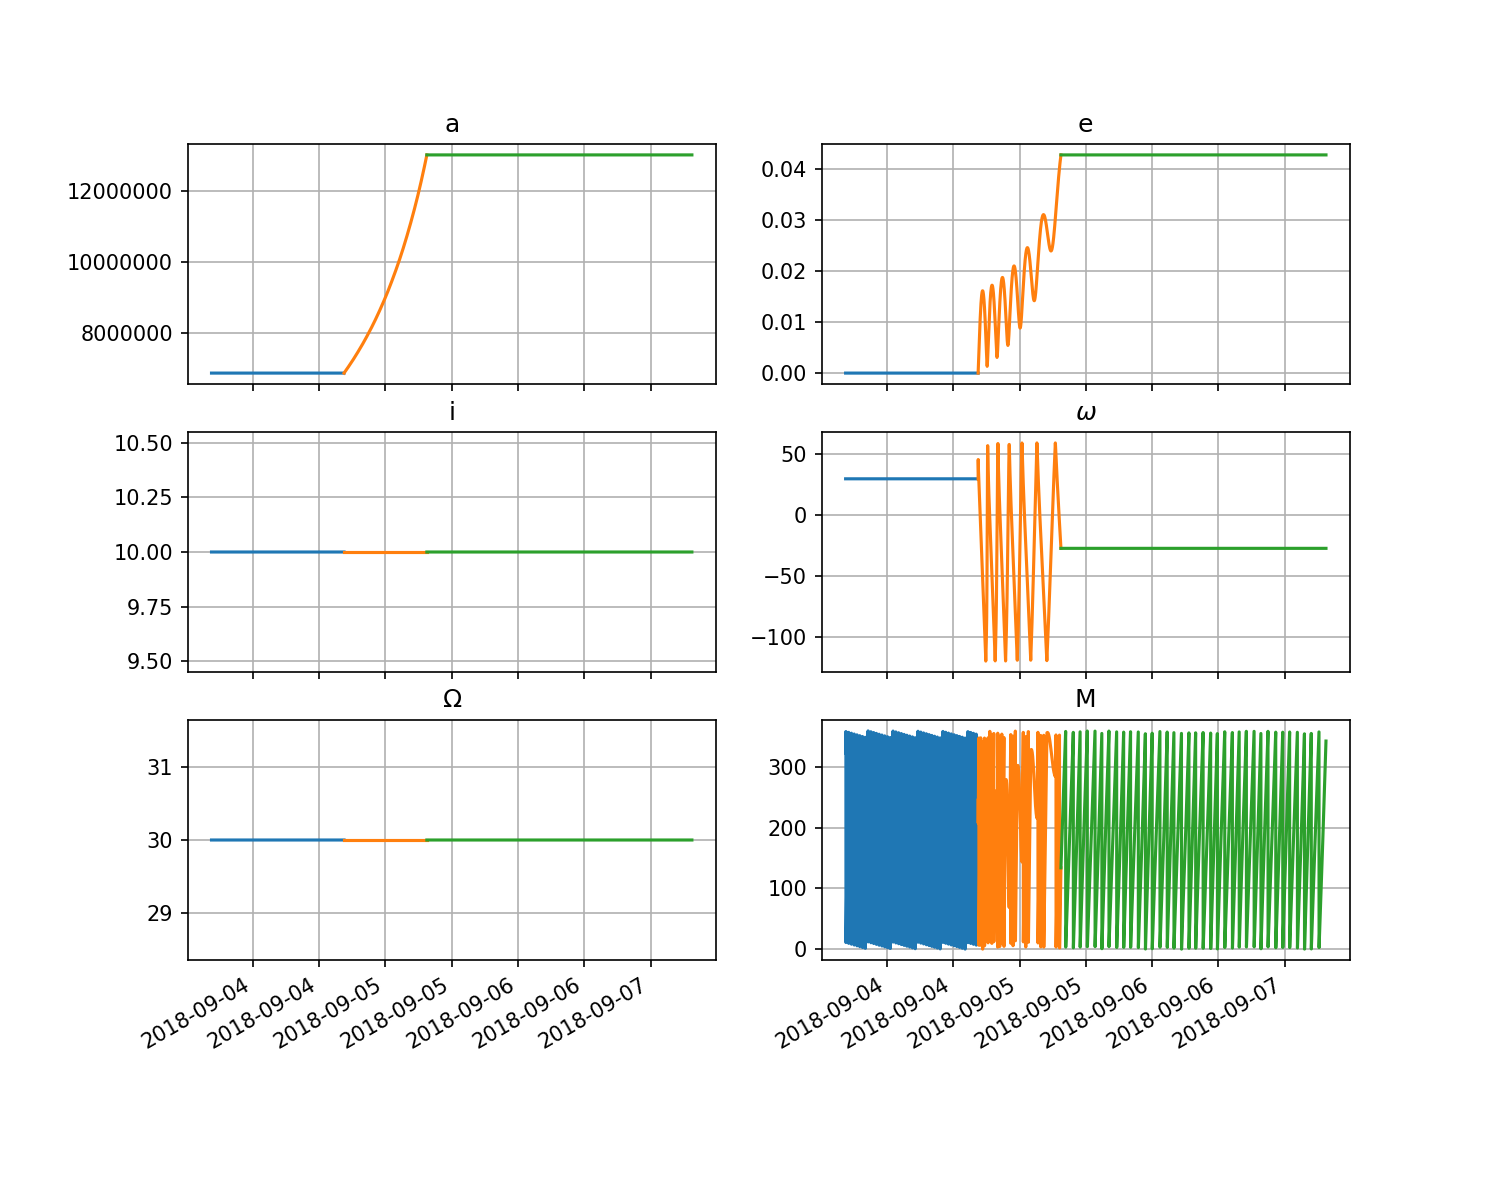

In [11]:
# PLOTTING CLASSICAL ORBITAL ELEMENTS
titles = ["a","e","i","$\omega$","$\Omega$","M"]
fig, axes = plt.subplots(3,2,figsize=(10,8))
for i in range(0,6):
    for j in range(0,len(maneuvers.history.maneuverIdxs)-1):
        maneuverSlice = slice(maneuvers.history.maneuverIdxs[j],maneuvers.history.maneuverIdxs[j+1])
        if i in [2,3,4,5]:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i]*180/np.pi)
        else:
            axes[int((i-i%2)/2),i%2].plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.coe[maneuverSlice,i])
        axes[int((i-i%2)/2),i%2].set_title(titles[i])
        
        fig.autofmt_xdate()
        axes[int((i-i%2)/2),i%2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
        axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
        axes[int((i-i%2)/2),i%2].grid(b=True)

<IPython.core.display.Javascript object>


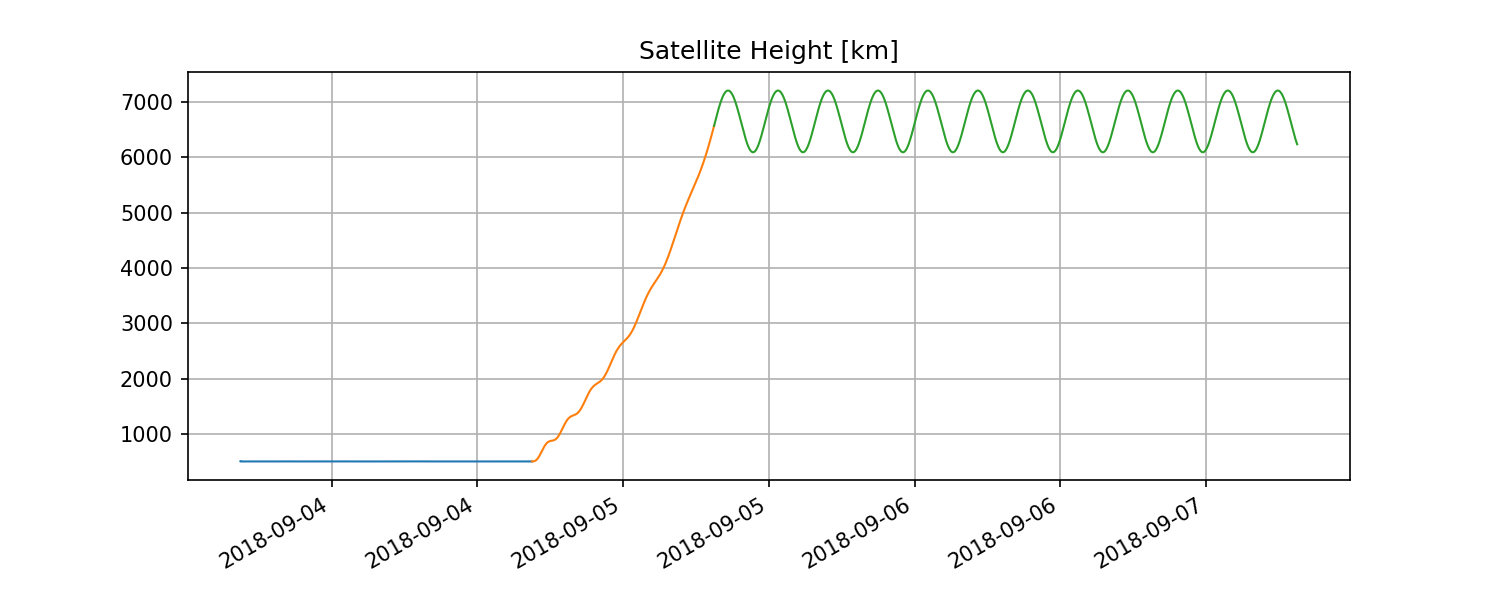

<IPython.core.display.Javascript object>


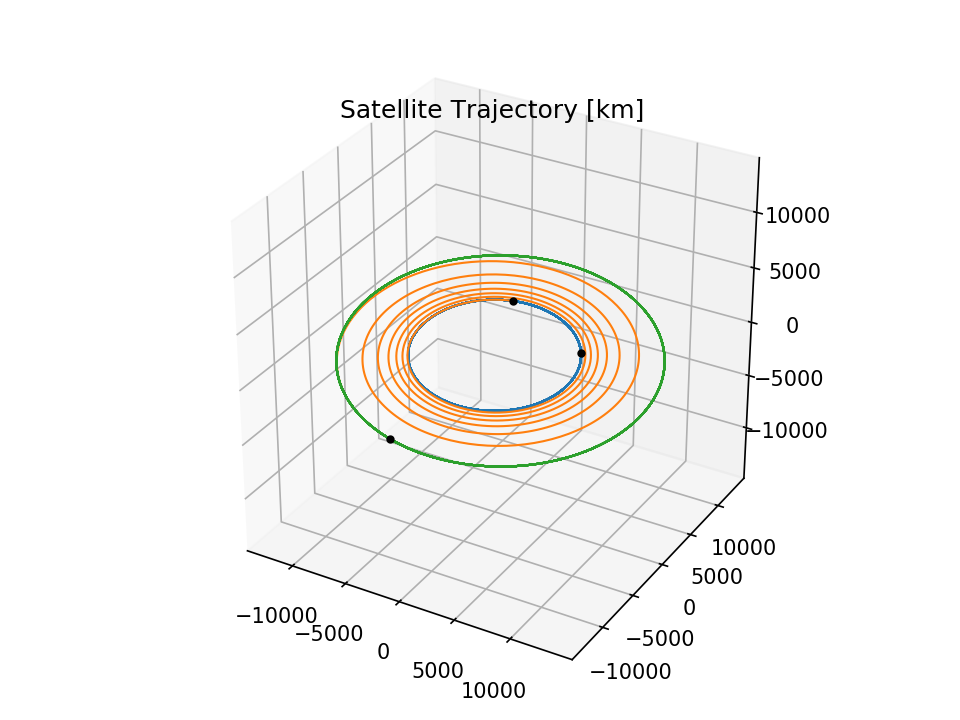

<IPython.core.display.Javascript object>


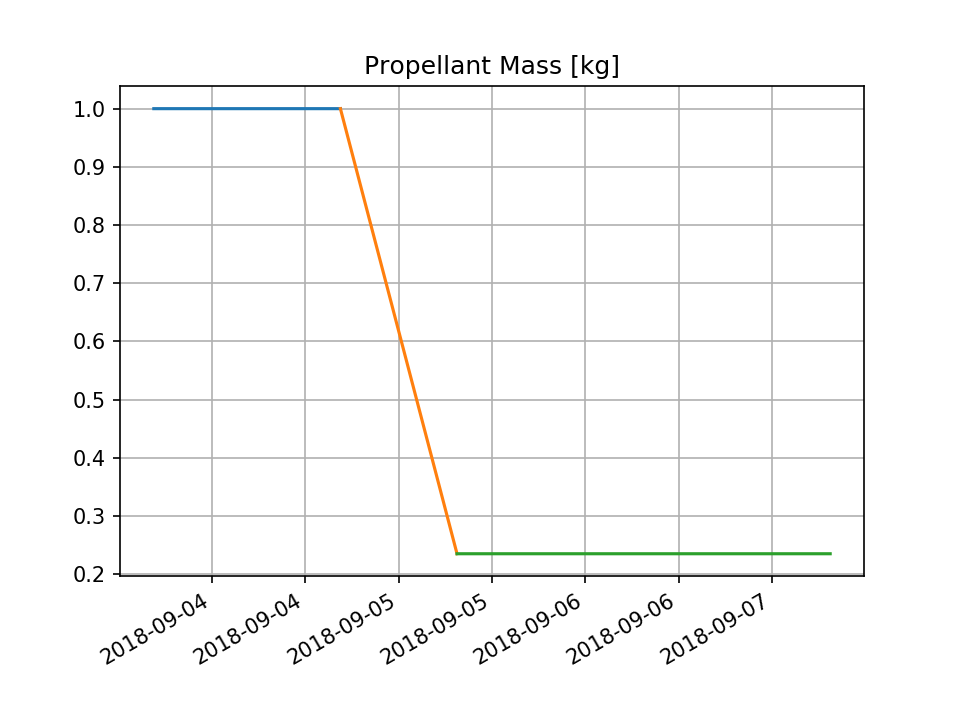

In [13]:
#Plot Height
fig, ax = plt.subplots(figsize=(10,4))
for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
    #plt.plot(maneuvers.history.t[maneuvers.history.maneuverIdxs[i]:maneuvers.history.maneuverIdxs[i+1]]/60/60/24,
    #        (np.linalg.norm(maneuvers.history.r[maneuvers.history.maneuverIdxs[i]:maneuvers.history.maneuverIdxs[i+1],:],axis=1)-constants.Re)/1000,linewidth=1)
    ax.plot(maneuvers.history.datetime[maneuverSlice],
            (np.linalg.norm(maneuvers.history.r[maneuverSlice,:],axis=1)-constants.Re)/1000,linewidth=1)
ax.set_title("Satellite Height [km]")
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.grid()

#Plot 3D Trajectory
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
markers = np.zeros([len(maneuvers.history.maneuverIdxs)-1,3])

for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
    ax3.plot3D(maneuvers.history.r[maneuverSlice,0]/1000,
              maneuvers.history.r[maneuverSlice,1]/1000,
              maneuvers.history.r[maneuverSlice,2]/1000,linewidth=1)
    markers[i,:]= maneuvers.history.r[maneuvers.history.maneuverIdxs[i],:]/1000
ax3.plot3D(markers[:,0],markers[:,1],markers[:,2],"k.")
helpers.set_axes_equal(ax3)
ax3.set_aspect("equal")
scale_x = 1.2
scale_y = 1.2
scale_z = 1.2
ax3.get_proj = lambda: np.dot(Axes3D.get_proj(ax3), np.diag([scale_x, scale_y, scale_z, 1]))
ax3.set_title("Satellite Trajectory [km]")

#Plot Propellant Usage
fig2, ax2 = plt.subplots()
for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
    ax2.plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.propMass[maneuverSlice])
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.grid()
ax2.set_title("Propellant Mass [kg]");
fig2.autofmt_xdate()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))